In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

C:\Users\Vishwas\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Vishwas\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df = pd.read_csv(r'\Data\FB.csv')

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [4]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [5]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [6]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [7]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

 Fitting SARIMA for Seasonal value m = 1
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5926.792, BIC=5947.245, Fit time=0.685 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5929.302, BIC=5939.528, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=5930.825, BIC=5946.165, Fit time=0.130 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5930.810, BIC=5946.149, Fit time=0.171 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=5928.521, BIC=5954.087, Fit time=0.726 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5930.139, BIC=5955.704, Fit time=0.634 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=5928.288, BIC=5958.967, Fit time=1.863 seconds
Total fit time: 4.243 seconds
Model summary for  m = 1
----------------------------------------------------------------------------------------------------
Evaluation metric results:-
MSE is : 73.01424039849306

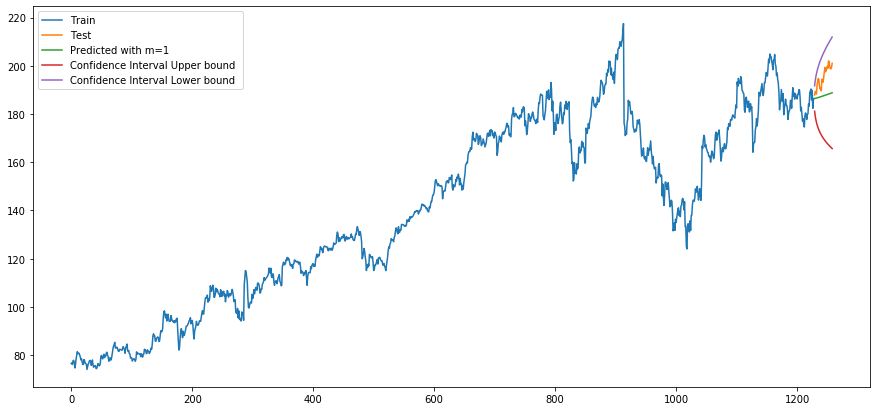

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


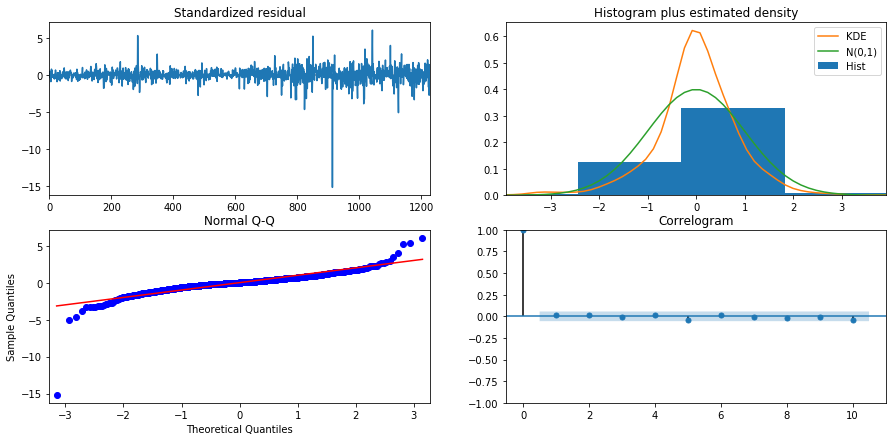

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 4
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 4); AIC=5930.606, BIC=5961.285, Fit time=1.326 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 4); AIC=5929.302, BIC=5939.528, Fit time=0.037 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 4); AIC=5932.751, BIC=5953.203, Fit time=0.252 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 4); AIC=5932.728, BIC=5953.181, Fit time=0.273 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 4); AIC=5931.257, BIC=5946.596, Fit time=0.122 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 4); AIC=5931.254, BIC=5946.593, Fit time=0.148 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 4); AIC=5932.982, BIC=5953.435, Fit time=0.734 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 4); AIC=5930.825, BIC=5946.165, Fit time=0.123 seconds
Fi

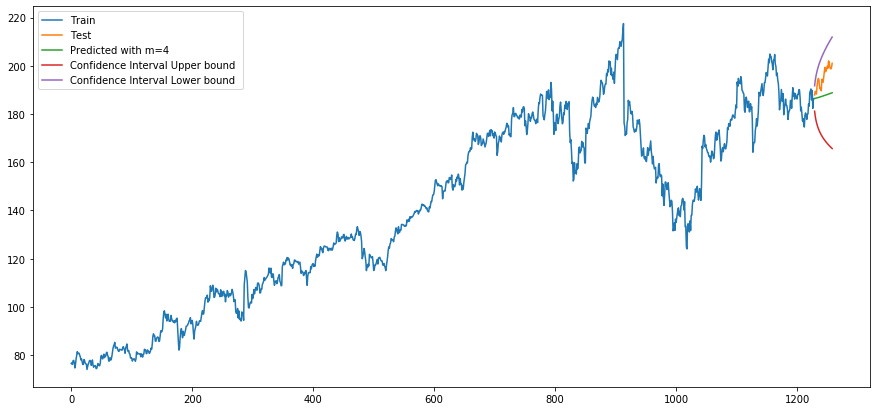

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


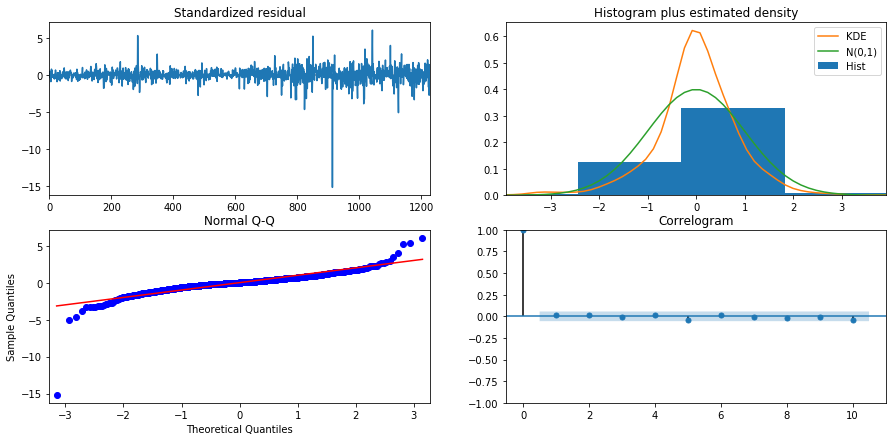

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 7
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=5926.233, BIC=5956.912, Fit time=2.889 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=5929.302, BIC=5939.528, Fit time=0.040 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=5931.993, BIC=5952.445, Fit time=0.420 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=5931.949, BIC=5952.402, Fit time=0.345 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=5928.579, BIC=5954.145, Fit time=1.446 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=5930.460, BIC=5966.252, Fit time=6.862 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=5928.583, BIC=5954.148, Fit time=1.378 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=5928.256, BIC=5964.048, Fit time=7.055 seconds
Fi

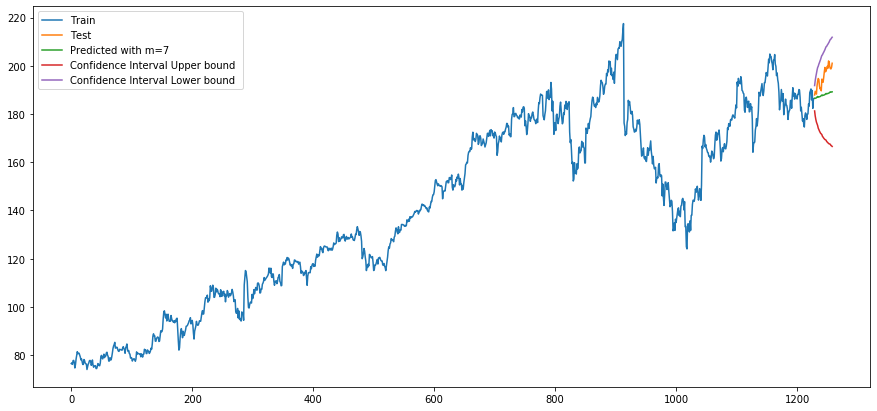

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 7


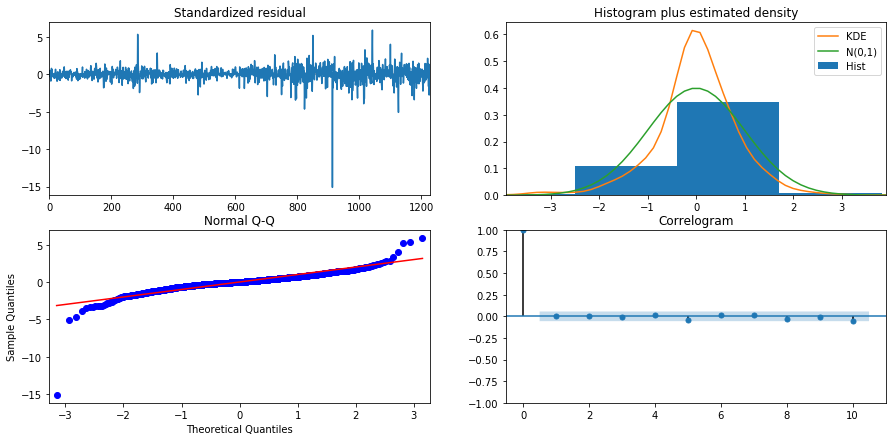

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 12
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=5930.743, BIC=5961.422, Fit time=2.967 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=5929.302, BIC=5939.528, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=5932.613, BIC=5953.066, Fit time=0.488 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=5932.598, BIC=5953.051, Fit time=0.578 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=5931.080, BIC=5946.419, Fit time=0.289 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=5931.082, BIC=5946.421, Fit time=0.282 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=5933.079, BIC=5953.531, Fit time=0.505 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=5930.825, BIC=5946.165, Fit time=0.132 s

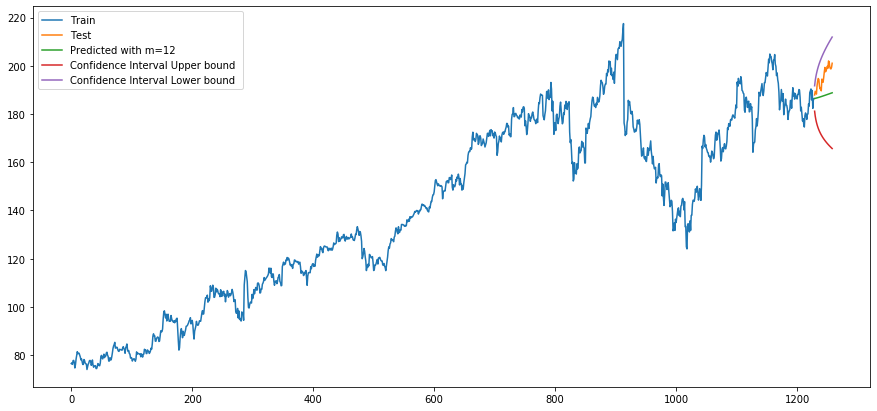

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


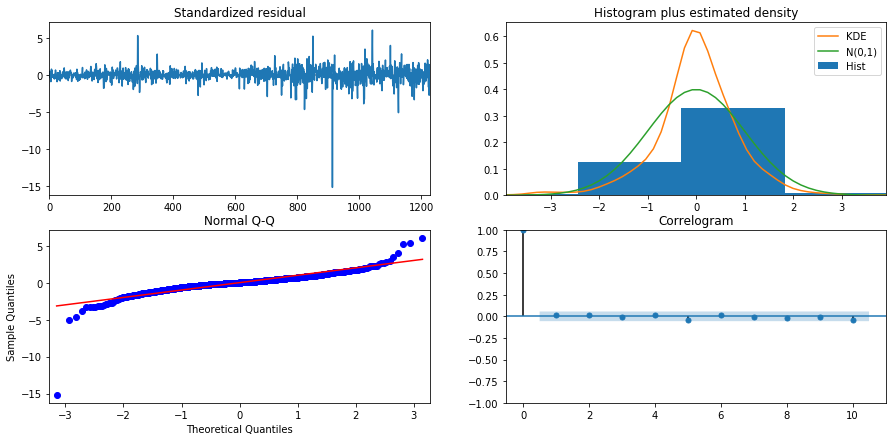

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 52
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 52); AIC=5927.302, BIC=5957.981, Fit time=45.590 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 52); AIC=5929.302, BIC=5939.528, Fit time=0.045 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 52); AIC=5932.550, BIC=5953.003, Fit time=8.176 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=5932.556, BIC=5953.009, Fit time=8.157 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 52); AIC=5928.504, BIC=5954.069, Fit time=31.940 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 52); AIC=5929.290, BIC=5965.082, Fit time=273.302 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 52); AIC=5928.481, BIC=5954.047, Fit time=26.452 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 52); AIC=5929.288, BIC=5965.080, Fit time=33

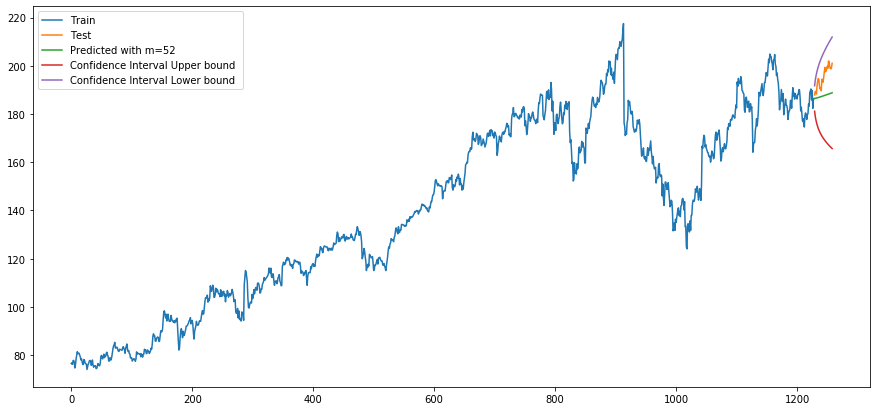

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 52


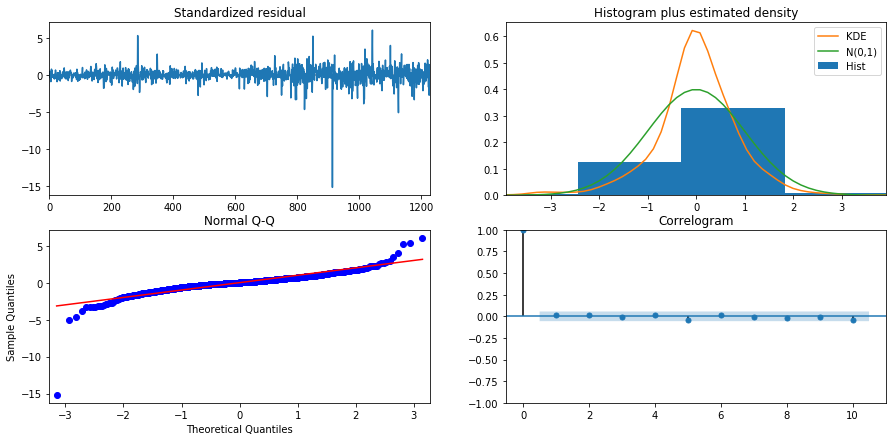

----------------------------------------------------------------------------------------------------


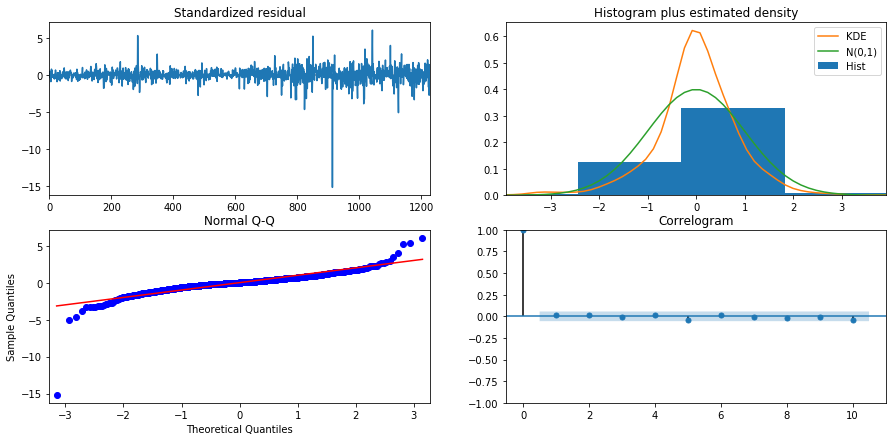

In [8]:
for m in  [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(train, start_p=1, start_q=1,
                                max_p=7, max_q=7, seasonal=True, start_P=1, start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast ,conf_int= stepwise_model.predict(n_periods=30,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(test, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(train, label='Train ')
    plt.plot(test, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    
    print("-"*100)